In [1]:
# импортируем библиотеки numpy и pandas
import pandas as pd
import numpy as np

# импортируем библиотеку datetime для работы с датами
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 90)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# загружаем данные датчиков
sensor_data = pd.read_csv('Notebooks/Data/sensors.csv')
sensor_data.head()

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

#### Группировка по значениям отдельного столбца

In [3]:
# группировка этих данных по столбцу/переменной sensor возвращает объект DataFrameGroupBy
grouped_by_sensor = sensor_data.groupby(['sensor'])
grouped_by_sensor

In [4]:
# получаем информацию о количестве групп, которые будут созданы
grouped_by_sensor.ngroups

2

Свойство **.groups** вернет питоновский словарь, ключи которого будут представлять имена каждой группы (если указано несколько столбцов, это будет кортеж).
Значения в словаре – это массив **индексных меток**, принадлежащих каждой соответствующей группе

In [5]:
# что представляют из себя найденные группы?
grouped_by_sensor.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

#### Просмотр результатов группировки
Сгруппированную переменную можно рассматривать как набор поименованных
групп, и ее можно использовать для просмотра содержимого групп.

In [6]:
# вспомогательная функция, печатающая содержимое групп
def print_groups(group_object):
    # итерируем по всем группам, печатая название группы и первые пять наблюдений в группе
    for name, group in group_object:
        print(name)
        print(group[:5])
        
# смотрим содержимое созданных групп
print_groups(grouped_by_sensor)

('accel',)
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
('orientation',)
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [7]:
# получаем информацию о количестве элементов в каждой группе
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [8]:
# получаем информацию о количестве элементов в каждом столбце каждой группы
grouped_by_sensor.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [9]:
# получаем данные конкретной группы
grouped_by_sensor.get_group(('accel',))[:5]

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

In [10]:
# извлекаем первые три строки в КАЖДОЙ группе
grouped_by_sensor.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [11]:
# извлекаем вторую строку КАЖДОЙ группы
grouped_by_sensor.nth(1)

    interval       sensor axis  reading
1          0        accel    Y      0.5
13         0  orientation    Y      0.1

In [12]:
# получаем описательные статистики по каждой группе
grouped_by_sensor.describe()

            interval                            ... reading                       
               count mean       std  min   25%  ...     min  25%   50%    75%  max
sensor                                          ...                               
accel           12.0  1.5  1.167748  0.0  0.75  ...     0.0  0.2  0.35  0.725  1.0
orientation     12.0  1.5  1.167748  0.0  0.75  ...     0.0  0.0  0.10  0.225  0.4

[2 rows x 16 columns]

#### Группировка по нескольким столбцам

In [13]:
# группируем по значениям столбцов sensor и axis
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

#### Группировка по уровням индекса
Группировку можно выполнить, используя вместо столбцов значения индекса.

In [14]:
# создаем копию данных и заново ПЕРЕСОЗДАДИМ ИНДЕКС
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

Теперь можно выполнить группировку по различным уровням иерархического
индекса. 

In [15]:
# группируем по первому уровню индекса
grb_l0 = mi.groupby(level=0)
print_groups(grb_l0)

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


Группировку по нескольким уровням можно выполнить, передав список уровней. Если у каждого уровня MultiIndex есть имена, то их можно использовать вместо целочисленных значений. 

In [16]:
# группируем по нескольким уровням индекса
print_groups(mi.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

#### Применение агрегирующих функций к группам
Агрегирующие функции можно применить к каждой группе с помощью метода
**.aggregate()** (или более короткого **.agg()**) объекта GroupBy. Параметр **.agg()** – это
ссылка на функцию, которая будет применяться к каждой группе. В случае с объектом DataFrame эта функция будет применяться к каждому столбцу данных внутри
группы.

In [17]:
# вычисляем среднее для каждого сенсора/оси
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg('mean'), sensor_axis_grouping.mean()

(                  interval  reading
 sensor      axis                   
 accel       X          1.5     0.85
             Y          1.5     0.35
             Z          1.5     0.15
 orientation X          1.5     0.15
             Y          1.5     0.25
             Z          1.5     0.00,
                   interval  reading
 sensor      axis                   
 accel       X          1.5     0.85
             Y          1.5     0.35
             Z          1.5     0.15
 orientation X          1.5     0.15
             Y          1.5     0.25
             Z          1.5     0.00)

**Результат агрегации получит идентично структурированный индекс**, что и исходные данные.
Для создания числового индекса и переноса уровней исходного
индекса в столбцы можно воспользоваться параметром **as_index=False**

In [18]:
# вместо индекса, совпадающего с индексом исходного объекта,
# создаем числовой индекс и переносим уровни исходного индекса в столбцы
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg('mean')

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [19]:
# применяем сразу несколько агрегирующих функций
sensor_axis_grouping.agg(['sum', 'std'])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [20]:
# применяем к каждому столбцу свою функцию
sensor_axis_grouping.agg({
    'interval': len,
    'reading': 'mean'
    }
)

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

Еще агрегирование можно применить к определенным столбцам с помощью
оператора [] объекта GroupBy

In [21]:
# вычисляем среднее только для столбца reading
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

#### Преобразование групп данных
Объект GroupBy предлагает метод **.transform()**, который применяет ту или иную
функцию ко всем значениям объекта DataFrame в каждой группе.

#### Общий процесс преобразования
Метод **.transform()** <u>объекта GroupBy</u> применяет функцию к каждому значению объекта DataFrame и возвращает другой объект DataFrame, который имеет следующие характеристики:
- он идентично проиндексирован, чтобы выполнить конкатенацию индексов во всех группах;
- количество строк равно количеству строк, просуммированному по всем группам;
- он состоит из несгруппированных столбцов, к которым библиотека pandas успешно применила заданную функцию (некоторые столбцы могут быть исключены).

In [22]:
# создаем объект DataFrame, который будем использовать в примерах
transform_data = pd.DataFrame({
    'Label': ['A', 'C', 'B', 'A', 'C'],
    'Values': [0, 1, 2, 3, 4],
    'Values2': [5, 6, 7, 8, 9],
    'Other': ['foo', 'bar', 'baz', 'fiz', 'buz']},
    index = list('VWXYZ')
)
transform_data

  Label  Values  Values2 Other
V     A       0        5   foo
W     C       1        6   bar
X     B       2        7   baz
Y     A       3        8   fiz
Z     C       4        9   buz

In [23]:
# сгруппируем по столбцу Label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label), grouped_by_label.groups

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


(None, {'A': ['V', 'Y'], 'B': ['X'], 'C': ['W', 'Z']})

In [24]:
# добавляем 10 ко всем значениям во всех столбцах
grouped_by_label[['Values', 'Values2']].transform(lambda x: x + 10)

   Values  Values2
V      10       15
W      11       16
X      12       17
Y      13       18
Z      14       19

#### Заполнение пропущенных значений групповым средним
В статистическом анализе довольно распространенный вид преобразования, использующий сгруппированные данные, – это замена пропущенных данных в каждой группе групповым средним (рассчитывается на основе непропущенных значений).

In [25]:
# создаем данные, чтобы продемонстрировать способ замены пропусков
df = pd.DataFrame({
    'Label': list('ABABAB'),
    'Values': [10, 20, 11, np.nan, 12, 22]
})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [26]:
# вычисляем среднее для каждой группы
grouped.mean()

       Values
Label        
A        11.0
B        21.0

Теперь предположим, что вам нужно заполнить все значения NaN в группе B, потому что затем в ходе выполнения других операций могут возникнуть трудности при обработке значений NaN.

In [27]:
# используем метод .transform(), чтобы заполнить значения NaN групповым средним
def fillna_x(x):
    return x.fillna(x.mean())

filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs_x = grouped.transform(fillna_x)
filled_NaNs, filled_NaNs_x

(   Values
 0    10.0
 1    20.0
 2    11.0
 3    21.0
 4    12.0
 5    22.0,
    Values
 0    10.0
 1    20.0
 2    11.0
 3    21.0
 4    12.0
 5    22.0)

#### Вычисление нормализованных z-значений с помощью преобразования

Еще один распространенный вид преобразования – вычисление нормализованных z-значений по группам данных. Для иллюстрации мы возьмем сгенерированный случайным образом ряд значений, используя нормальное распределение со средним значением 0,5 и стандартным отклонением 2.
Данные индексируются по дням, и на основе 100-дневного окна вычисляется скользящее среднее для
каждого значения

In [28]:
# генерируем временной ряд со скользящими средними
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365 * 3),
                pd.date_range('2013-01-01', periods=365 * 3))
periods = 100

rolling = data.rolling(
    window = periods,
    min_periods = periods,
    center = False
).mean().dropna()

rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

<Axes: >

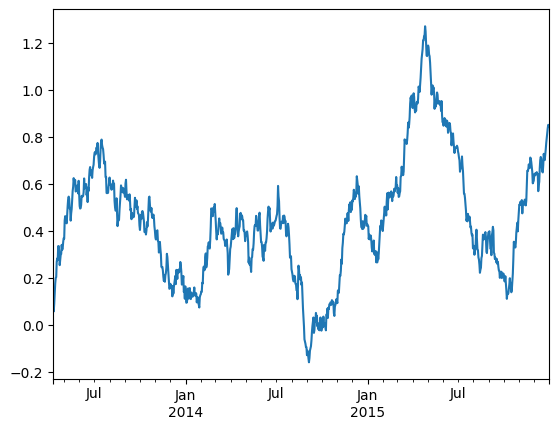

In [29]:
# визуализируем ряд
rolling.plot()

In [34]:
# вычисляем среднее и стандартное отклонение по каждому году

# мы берем свойство x.year так как это свойство элемена индекса нашей серии.
# в документации написано, что если мы используем groupby для Series и первый параметр (by)
# является функция, то она применяется для каждого элемента индекса. (это можно проверив
# через вызов dir(rolling.index[0]))
group_key = lambda x: x.year
def group_key_debug(x):
    return x.year

# groups = rolling.groupby(group_key)
groups = rolling.groupby(group_key_debug)
groups.agg(['mean', 'std'])

          mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

Для выполнения стандартизации следующий программный код задает функцию, вычисляющую z-значения, применяет ее в качестве преобразования к каждой группе и сообщает о новом среднем значении и новом стандартном отклонении

In [35]:
# выполняем z-преобразование
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg(['mean', 'std'])

              mean  std
2013  2.237141e-16  1.0
2014 -2.223488e-16  1.0
2015  3.205959e-16  1.0

<Axes: >

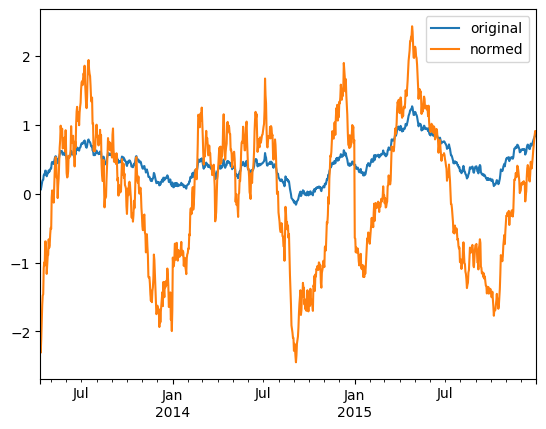

In [36]:
# визуализируем исходные и стандартизированные данные
compared = pd.DataFrame({'original': rolling, 'normed': normed})
compared.plot()

#### Исключение групп из процедуры агрегирования
С помощью метода **.filter()** можно выборочно удалить группы данных из обработки. В этот метод передают функцию, с помощью которой по каждой группе можно принять решение о включении данной группы в итоговый результат. Если функция возвращает значение True, группа включается в результат; если функция возвращает значение False, группа исключается.

In [37]:
# создаем данные для наших примеров
df = pd.DataFrame({
    'labels': list('AABCCC'),
    'values': [1, 2, 3, 4, np.nan, 8]
})
df

  labels  values
0      A     1.0
1      A     2.0
2      B     3.0
3      C     4.0
4      C     NaN
5      C     8.0

#### Исключение групп из процедуры агрегирования
С помощью метода **.filter()** можно выборочно удалить группы данных из обработки. 
В этот метод передают функцию, с помощью которой по каждой группе
можно принять решение о включении данной группы в итоговый результат.
Если функция возвращает значение True, группа включается в результат; если функция
возвращает значение False, группа исключается.

In [38]:
# создаем данные для наших примеров
df = pd.DataFrame({
    'label': list('AABCCC'),
    'value': [1, 2, 3, 4, np.nan, 8]
})
df

  label  value
0     A    1.0
1     A    2.0
2     B    3.0
3     C    4.0
4     C    NaN
5     C    8.0

Сначала удалим группы, которые не соответствуют установленному минимуму элементов.
В частности, удалим группы с одним непропущенным значением и меньше

In [39]:
# берем группы с более чем одним элементом
f = lambda x: x.value.count() > 1
df.groupby('label').filter(f)

  label  value
0     A    1.0
1     A    2.0
3     C    4.0
4     C    NaN
5     C    8.0

In [40]:
# оставляем группы у которых нет ни одного пропущенного значения
f = lambda x: x.value.isna().sum() == 0
def f_debug (x):
    # print(x.name)
    return x.value.isna().sum() == 0

grouped_l = df.groupby('label')
grouped_l.filter(f_debug)

  label  value
0     A    1.0
1     A    2.0
2     B    3.0

In [56]:
# отбираем группы со средним 2.0 и выше
grouped = df.groupby('label')
group_mean = grouped.mean().mean() # среднее по всем группам
f = lambda x: abs(x.value.mean() - group_mean) > 2.0
df.groupby('label').filter(f)

  label  value
3     C    4.0
4     C    NaN
5     C    8.0